In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=['Month'])
df

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

<Axes: xlabel='Month'>

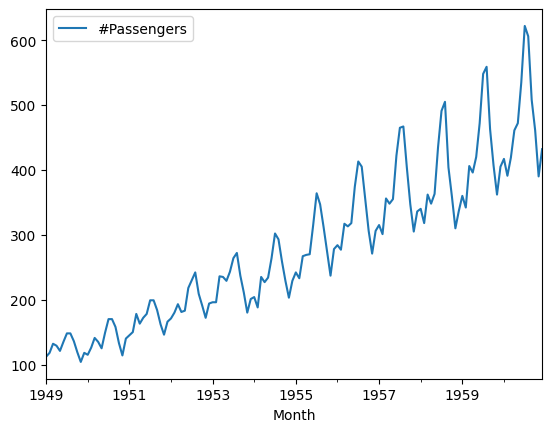

In [50]:
df.plot()

C:\Users\molde\AppData\Local\Temp\ipykernel_53124\3130792054.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


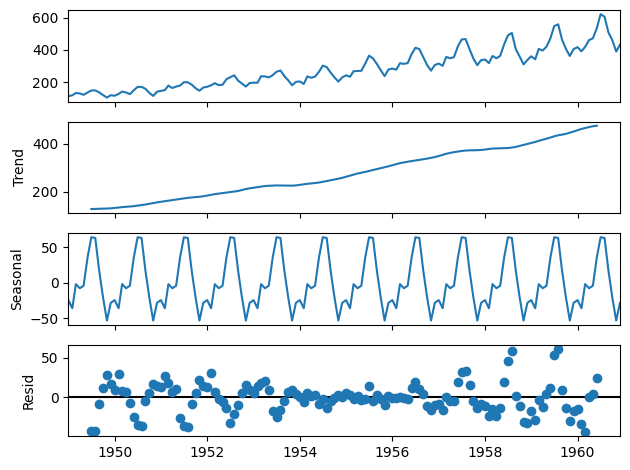

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose #импортируем библиотеку 
decomposition=seasonal_decompose(df)
fig=decomposition.plot()
fig.show()

In [52]:
import numpy as np

In [53]:
data = np.array([15, 20,25,30,25,27])
data

array([15, 20, 25, 30, 25, 27])

In [54]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1
data = np.array([15, 20, 25, 30, 25, 27])
a = 0.9
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

[15.      19.5     24.45    29.445   25.4445  26.84445]


In [55]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]


In [56]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(
	"daily-total-female-births.csv", 
    header=0, 
    index_col=0
).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [57]:
df

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [58]:
df_diff_1 = df.diff().dropna()

In [59]:
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.625178633871382
p-value:  1.5472400091966898e-23
Critical values:  {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
ряд стационарен


In [60]:
test1

(-12.625178633871382,
 1.5472400091966898e-23,
 6,
 357,
 {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036},
 2355.0565353964653)

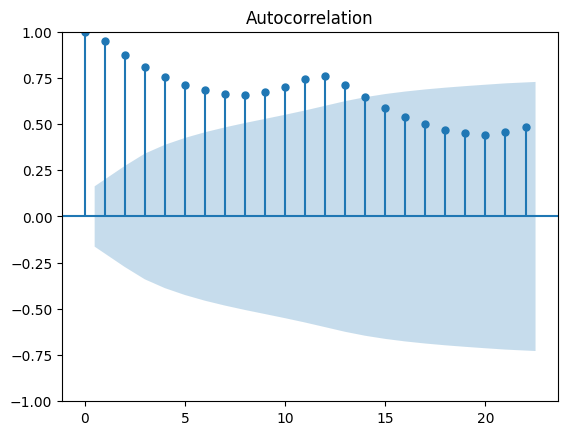

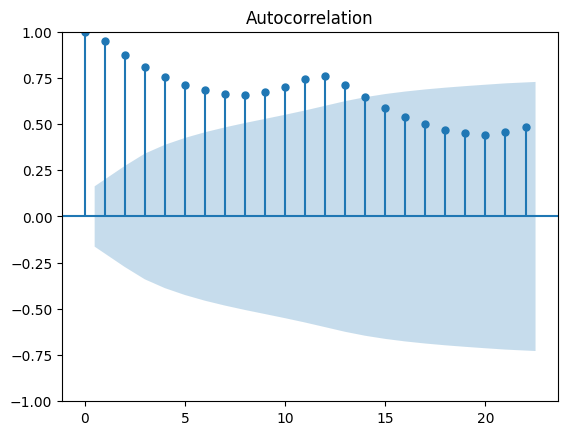

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=['Month'])
plot_acf(df)

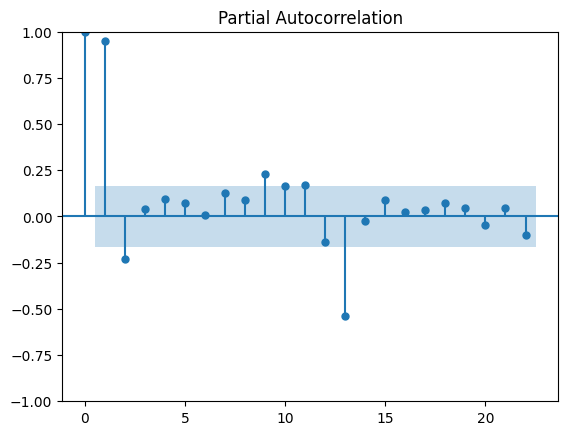

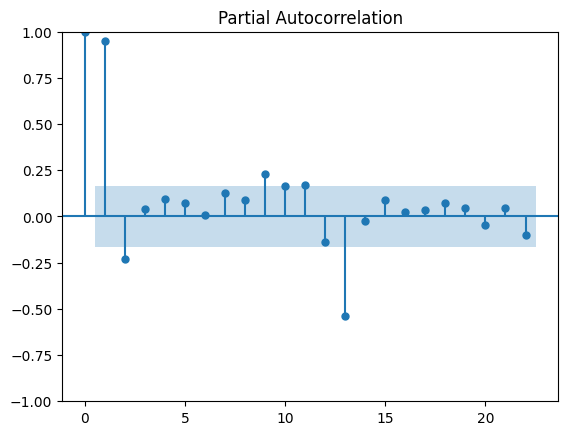

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)

In [68]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("opsd_germany_daily.csv", index_col='Date', parse_dates=['Date'], sep=",")
df

Consumption     Wind   Solar  Wind+Solar
Date                                                
2006-01-01   1069.18400      NaN     NaN         NaN
2006-01-02   1380.52100      NaN     NaN         NaN
2006-01-03   1442.53300      NaN     NaN         NaN
2006-01-04   1457.21700      NaN     NaN         NaN
2006-01-05   1477.13100      NaN     NaN         NaN
...                 ...      ...     ...         ...
2017-12-27   1263.94091  394.507  16.530     411.037
2017-12-28   1299.86398  506.424  14.162     520.586
2017-12-29   1295.08753  584.277  29.854     614.131
2017-12-30   1215.44897  721.247   7.467     728.714
2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 4 columns]

In [69]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Consumption'].values)

if result[0] > result[4]['5%']: 
    print ('Ряд нестационарен')
else:
    print ('Ряд стационарен')

Ряд стационарен


In [70]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

In [71]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Fri, 03 Jan 2025   AIC                          48483.625
Time:                        11:14:27   BIC                          48547.230
Sample:                    01-09-2006   HQIC                         48506.095
                         - 09-22-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

C:\Users\molde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [74]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
pred

C:\Users\molde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2017-09-23    1199.580761
2017-09-24    1132.051688
2017-09-25    1392.772651
2017-09-26    1425.877770
2017-09-27    1424.606502
                 ...     
2017-12-27    1355.220188
2017-12-28    1359.014426
2017-12-29    1334.516355
2017-12-30    1299.851112
2017-12-31    1309.602440
Freq: D, Length: 100, dtype: float64

In [75]:
test_data

Date
2017-09-23    1191.10345
2017-09-24    1115.07288
2017-09-25    1419.59171
2017-09-26    1445.40606
2017-09-27    1451.00792
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 100, dtype: float64